# Random Sample Imputation
### Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

### When should it be used? 
 - It assumes that the data are missing completely at random(MCAR)

In [2]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
#Changing Nan with random sample
df.Age.dropna().sample(df.Age.isnull().sum(), random_state=11)

585    18.0
341    24.0
636    32.0
716    38.0
817    31.0
       ... 
488    30.0
376    22.0
830    15.0
710    24.0
827     1.0
Name: Age, Length: 177, dtype: float64

In [6]:
def impute_nan(df, var, median):
    df[var + '_median'] = df[var].fillna(median)
    df[var + '_randomSample'] = df[var]
    # It will have random sample to fill the Nan
    random_sample = df[var].dropna().sample(df[var].isnull().sum(), random_state=11)
    # Pandas need to have same index in order to merge data set
    #made random_sample index which will be equal to _randomSample
    random_sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(),  var + "_randomSample"] = random_sample
    

In [7]:
median = df.Age.median()

In [8]:
impute_nan(df, 'Age', median)

In [9]:
df.head()

,Survived,Age,Fare,Age_median,Age_randomSample
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


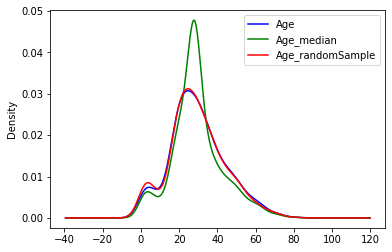

In [11]:
plt.figure()
df.Age.plot(kind='kde', color='blue', label='Age')
df.Age_median.plot(kind='kde', color='green', label='Age_median')
df.Age_randomSample.plot(kind='kde', color='red', label='Age_randomSample')
plt.legend()
plt.show()

## Advantages
1. Easy To implement
2. There is less distortion in variance
## Disadvantage
1. Every situation randomness wont work

- But not always good to implement 